In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./data/Visualization for company stakeholders.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Bar plot

Y    415
N    185
Name: Loan_Status, dtype: int64


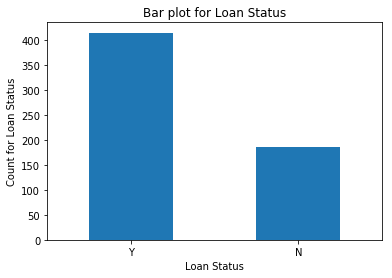

In [9]:
loan_status = data['Loan_Status'].value_counts()
print(loan_status)
plt.xlabel('Loan Status')
plt.ylabel('Count for Loan Status')
plt.title('Bar plot for Loan Status')
loan_status.plot.bar(rot=0)


# Bar plot(Unstack) with groupby

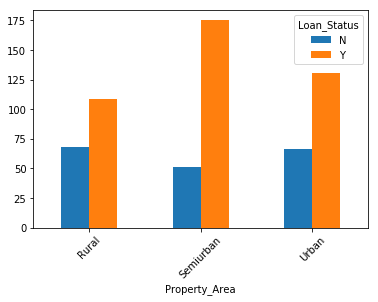

In [11]:
property_and_loan =  data.groupby(['Property_Area','Loan_Status'])
property_and_loan = property_and_loan.size().unstack()

property_and_loan.plot(kind='bar', stacked=False, rot=45)
plt.show()

# Bar plot(Stacked) with groupby

Text(0, 0.5, 'Loan Status')

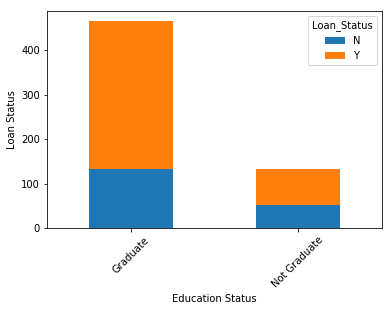

In [12]:
education_and_loan = data.groupby(['Education','Loan_Status'])
education_and_loan = education_and_loan.size().unstack()

education_and_loan.plot(kind='bar',stacked=True, rot=45)
plt.xlabel("Education Status")
plt.ylabel("Loan Status")

# Density plot

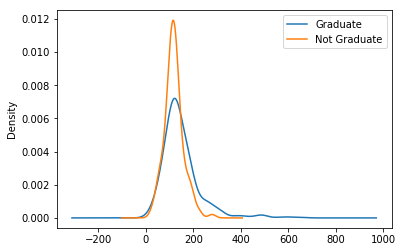

In [13]:
graduate = data[data['Education']=='Graduate']
not_graduate = data[data['Education']=='Not Graduate']

graduate['LoanAmount'].plot(kind='density', label='Graduate')
not_graduate['LoanAmount'].plot(kind='density', label='Not Graduate')

#For automatic legend display
plt.legend()

# Scatter plot

Text(0.5, 1.0, 'Total Income')

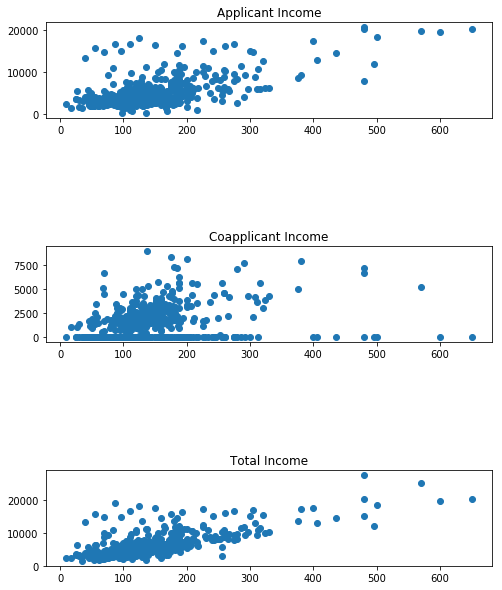

In [21]:
fig,(ax_1,ax_2,ax_3) = plt.subplots(nrows=3, ncols=1, figsize = (8,10))
plt.subplots_adjust(hspace=1.35)

ax_1.scatter(data['LoanAmount'], data['ApplicantIncome'])
ax_1.set_title("Applicant Income")

ax_2.scatter(data['LoanAmount'] ,data['CoapplicantIncome'])
ax_2.set_title('Coapplicant Income')

data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

ax_3.scatter(data['LoanAmount'], data['TotalIncome'])
ax_3.set_title('Total Income')